In [1]:
import numpy as np # for creation of arrays
import pandas as pd # for making data frames
import csv # outputs csv files
 
from rdkit import Chem # used to draw out structures of molecules
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

In [2]:
def check_group(chain, group):
          
    '''
    
    check_group:
    ------------
    
    A function that checks a string for a particular substring and returns the corresponding boolean.
    
    Args:
    -----
    
    chain: string to check
    group: substring being tested for
    
    Returns:
    --------
    
    group_exists: boolean showing whether or not that substring was located 
    
    '''
        
    try:
        pos = chain.index(group) # finds index of start of group if possible 
    except ValueError: # if error occurs, group is not present                
        pos = np.nan 
        
    if np.isnan(pos): # identifies if it located the specified string
        group_exists = False # it sets the correct boolean to say whether or not that string is present
    else:
        group_exists = True
        
    return(group_exists)

In [3]:
def find_length_chain(chain, letter):
              
    '''
    
    find_length_chain:
    ------------------
    
    A function that takes in a string such as C8 or C8E1 and finds the chain length from that information 
    i.e. the number that appears after it
    
    Args:
    -----
    
    chain: string to check
    letter: group for which the chain length will be found
    
    Returns:
    --------
    
    num: chain length
    
    '''
       
    num = 0  # if letter not present, the length is returned as zero
    
    try:
        pos = chain.index(letter) # finds index of letter if possible 
    except ValueError:                
        pos = np.nan
        
    if not np.isnan(pos): # checks letter exists in string
        for index in range(len(chain)): # loops through the length of the string
            if pos+index+1 > len(chain): # stops the loop failing at the end of the string
                break
                
            char = chain[pos+index+1:pos+index+2] # finds where letter is and finds character directly after
            if not char.isdigit(): # checks if the next character is a number
                break             
            else: # if it is a number, it goes back to the position of the letter and gives integer number 
                num = int(chain[pos+1:pos+index+2]) # up to the point it has checked 
    
    return(num)

In [4]:
def create_smiles_string(chain_list, func_group):
          
    '''
    
    create_smiles_string:
    ---------------------
    
    A function that uses the carbon chain length and the head group to construct the corresponding smiles
    string to describe that surfactant.
    
    Args:
    -----
    
    chain_list: list of chain information about the sufactant such as C8 or C8E1
    func_group: surfactant head group
    
    Returns:
    --------
    
    smiles_list: smiles string for each surfactant in a list
    smiles_head_list: smiles string for each head group separately
    smiles_tail_list: smiles string for each tail group separately
    carbon_length: length of carbon chain (tail group)
    ethoxy_length: length of ethoxylate chain 
    
    '''
           
    smiles_list = []; smiles_head_list = []; smiles_tail_list = []; carbon_length = []; ethoxy_length = []

    for ind, chain in enumerate(chain_list): # loops through each molecule in the list
        smiles_str = "" # sets up initial smiles strings
        smiles_head = "C"
        smiles_tail = ""
        
        have_ph = False # used to control where the Ph is added in the chain
        
        if check_group(chain, "Ph"): # adds phenyl ring to tail smiles if necessary
            smiles_tail += "C1=CC=C(C=C1)"
        
        if check_group(chain, "Ph") and not check_group(chain, "E"):
            smiles_str += "C1=CC=C(C=C1)"  # if there is no E group, the Ph group adds on at the start
            have_ph = True # ensures that another Ph is not added
            
        if check_group(chain, "Py"): 
            smiles_str += "C1=CC=[NH+]C=C1"
            smiles_head += "C1=CC=[NH+]C=C1"
        
        if not check_group(chain, "C"): # error checking as assume all chains start with a carbon
            print("Error: no carbons")
        carbon_len = find_length_chain(chain, "C") # counts the number of carbon atoms 
        carbon_length.append(carbon_len) 
        carbon_smiles = "C" * carbon_len # creates a carbon chain smile string using chain length
        smiles_str += carbon_smiles
        smiles_tail += "C" * (carbon_len-1)
        
        if not have_ph and check_group(chain, "Ph"): # if there is an E and Ph group, the Ph group is added now
            smiles_str += "C1=CC=C(C=C1)"
            have_ph = True                      
        
        if check_group(chain, "E"): # checks if it is an ethoxylate
            e_len = find_length_chain(chain, "E") # if so, it uses function to find the length of the E group
            ethoxy_length.append(e_len)        
            smiles_str += "O" # adds ethoxylate group to the smiles string
            smiles_head += "O"
            ethoxy_smiles = "CCO" * e_len
            smiles_str += ethoxy_smiles
            smiles_head += ethoxy_smiles
        else:
            ethoxy_length.append(0) # says whether or not it is an ethoxylate

        if func_group[ind] == "CO2Na": # adds on information to smiles string to describe functional group
            smiles_str += "C(=O)[O-]"          
            smiles_head += "C(=O)[O-]"
        elif func_group[ind] == "NH3Cl":
            smiles_str += "[NH3+]"
            smiles_head += "[NH3+]"
        elif func_group[ind] == "NMe3Br":
            smiles_str += "[N+](C)(C)C"
            smiles_head += "[N+](C)(C)C"
        elif func_group[ind] == "OSO3Na":
            smiles_str += "OS(=O)(=O)[O-]"
            smiles_head += "OS(=O)(=O)[O-]"
        elif func_group[ind] == "SO3Na":
            smiles_str += "S(=O)(=O)[O-]"
            smiles_head += "S(=O)(=O)[O-]"
        elif func_group[ind] == "Carboxylic Acid":
            smiles_str += "C(=O)[O-]"
            smiles_head += "C(=O)[O-]"
        elif func_group[ind] == "NMe2NBzCl":
            smiles_str += "[N+](C)(C)CC1=CC=C([N+](=O)[O-])C=C1"
            smiles_head += "[N+](C)(C)CC1=CC=C([N+](=O)[O-])C=C1"
        elif func_group[ind] == "SO3H":
            smiles_str += "S(=O)(=O)[O-]"
            smiles_head += "S(=O)(=O)[O-]"
        elif func_group[ind] == "NH3Ac":
            smiles_str += "[NH3+]"
            smiles_head += "[NH3+]"
        
        smiles_list.append(smiles_str) # creates list of smile strings
        smiles_head_list.append(smiles_head)
        smiles_tail_list.append(smiles_tail)
        
    return(smiles_list, smiles_head_list, smiles_tail_list, carbon_length, ethoxy_length)

In [5]:
cmc_data = pd.read_csv(open("Submit_Data/CMC_list.csv"), 
                       delimiter = (","))  
# reads in data about the critical micelle concentration, values are separated by a comma
    
func_group_list = []; chain_list = []; counter_ion_list = []; cmc_list = []

for ind, row in cmc_data.iterrows(): # reads in the rows of the data 
    
    func_group = row["Surfactant"] # finds head group 
    chain = row["Chain"] # finds chain length 
    counter_ion = row["Counter Ion"] # finds counter ion
    cmc = row["CMC / mM"] # finds CMC data
    
    func_group_list.append(func_group)  # adds the data to separate lists  
    chain_list.append(chain); counter_ion_list.append(counter_ion); cmc_list.append(cmc)

In [6]:
smiles, smiles_head, smiles_tail, carbon_length, ethoxy_length = create_smiles_string(chain_list, func_group_list)

In [7]:
header = ["Surfactant", "Chain", "Smiles", "Head Smiles", "Tail Smiles", "Carbon Length", "Ethoxy Length", 
          "Counter Ion", "CMC / mM"]  # creates headers for the new outputted csv file

# creates a new csv file with smiles string and length of different groups
with open("Submit_Data/output_smiles.csv", "w") as file:
    writer = csv.writer(file) # creates a new file
    writer.writerow(header)   # adds the headers as the first row in the file
                   
    # finds a row of the new data to be added to the csv file using the index
    for index, func_group in enumerate(func_group_list):
        current_row = [func_group, chain_list[index], smiles[index], smiles_head[index], smiles_tail[index],
                       carbon_length[index], ethoxy_length[index], counter_ion_list[index], cmc_list[index]]
                             
        writer.writerow(current_row)  # writes the new row to the csv file

,Functional Group,Chain,Smiles,Structure
0,CO2Na,C7,CCCCCCCC(=O)[O-],
1,CO2Na,C8,CCCCCCCCC(=O)[O-],
2,CO2Na,C9,CCCCCCCCCC(=O)[O-],
3,CO2Na,C10,CCCCCCCCCCC(=O)[O-],
4,CO2Na,C11,CCCCCCCCCCCC(=O)[O-],
5,CO2Na,C12,CCCCCCCCCCCCC(=O)[O-],
6,CO2Na,C13,CCCCCCCCCCCCCC(=O)[O-],

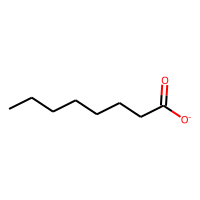
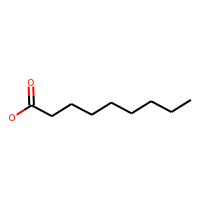
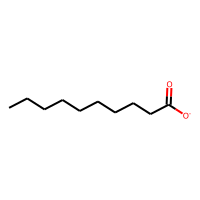
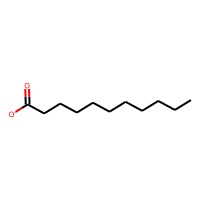
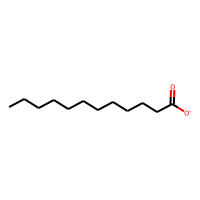
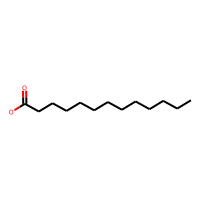
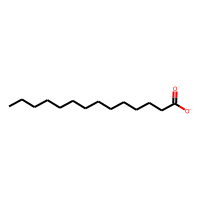

In [8]:
PandasTools.RenderImagesInAllDataFrames(images = True) # allows images to be printed next to the list

# creates data frame with smiles string to be able to print molecule
molecule_smiles = pd.DataFrame(func_group_list, columns = ["Functional Group"])
molecule_smiles["Chain"] = chain_list
molecule_smiles["Smiles"] = smiles
# creates molecule structure from the smiles string
mols = [Chem.MolFromSmiles(smiles_val) for smiles_val in molecule_smiles["Smiles"]] 
molecule_smiles["Structure"] = mols # adds molecule structure to the data frame

molecule_smiles[0:7] # prints data in table within specified range 